# Linear Models



**Maestría en Inteligencia Artificial Aplicada**



**Materia:** Ciencia y analítica de datos


**Profesor:** Dra. María de la Paz Rico Fernández


Actividad Semanal -- 7 Regresiones y K means


**Integrante:** Norma de los Ángeles García López - A01228278



- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

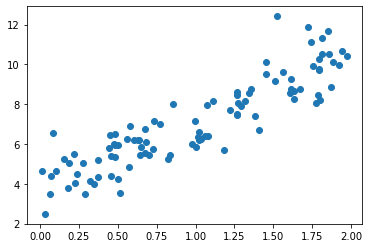

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

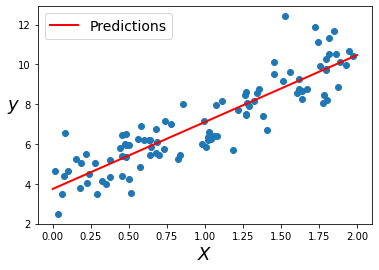

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

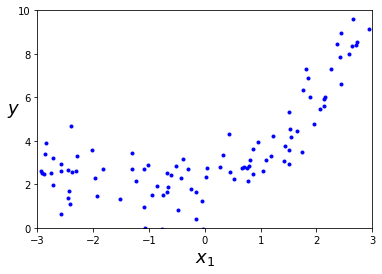

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [ ]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

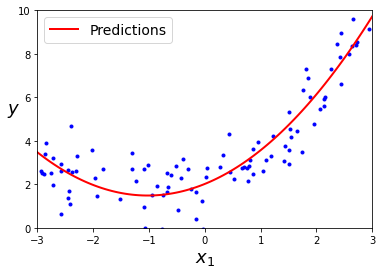

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
len(X)

1000

In [ ]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

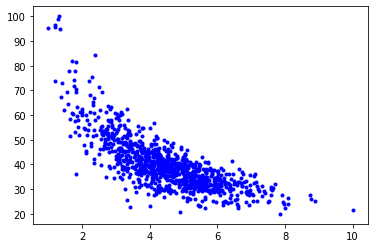

In [ ]:
plt.plot(X,y,'b.')

## *Ejercicio 1.1-Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).*

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#lineal
reg_lineal = LinearRegression(fit_intercept=True)
reg_lineal.fit(X_train, y_train)

Y_new = reg_lineal.predict(X_test)
reg_lineal.coef_, reg_lineal.intercept_

(array([-6.06532811]), 67.11966157000516)

The model estimates:

$\hat{y} =  -6.065X + 67.12$

Text(0.5, 1.0, 'Lineal')

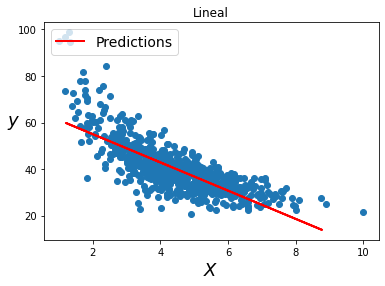

In [ ]:
y_fit = reg_lineal.predict(X_test)

plt.scatter(X_train, y_train)
plt.plot(X_test, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Lineal")

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, Y_new))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_new)))
print('r2_score',r2_score(y_test, Y_new))

Error medio Absoluto (MAE): 5.258989429618238
Root Mean Squared Error: 7.366177821309595
r2_score 0.5550818583506523


## *Ejercicio 1.2-Regresión Polinomial.*
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [ ]:
#polinomial
poli_nom = PolynomialFeatures(degree=3, include_bias=False)
X_poli_nom_train = poli_nom.fit_transform(X_train)
reg_lineal = LinearRegression(fit_intercept=True)
reg_lineal.fit(X_poli_nom_train, y_train)
reg_lineal.coef_, reg_lineal.intercept_

(array([-31.43623534,   4.46604937,  -0.22684969]), 109.17050688841161)

The model estimates:

$\hat{y} =  -31.44X + 4.47X^2 + -0.23X^3 + 109.17$

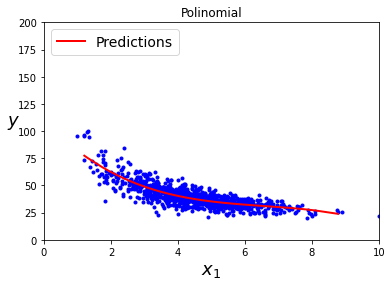

In [ ]:
#Gráfico polinomial

X_poli_nom_test = poli_nom.fit_transform(X_test)
y_pred = reg_lineal.predict(X_poli_nom_test)

order = np.argsort(X_test.values.ravel())

sortedXPolinom = X_test.values.ravel()[order]
sortedYPolinom = y_test.values.ravel()[order]
sorted_predicpolinomy = y_pred[order]


plt.plot(X, y, "b.")
plt.plot(sortedXPolinom, sorted_predicpolinomy, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Polinomial")
plt.axis([0, 10, 0, 200]);

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(sortedYPolinom, sorted_predicpolinomy))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(sortedYPolinom, sorted_predicpolinomy)))
print('r2_score',r2_score(sortedYPolinom, sorted_predicpolinomy))

Error medio Absoluto (MAE): 4.805825758508832
Root Mean Squared Error: 6.237085579953109
r2_score 0.6810231803885303


## *Ejercicio 1.3- Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.*

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

# *1.3.1-Modelo Ridge*

In [ ]:
mRidge = Ridge(alpha= 1)
mRidge.fit(X_train, y_train)
mRidge.coef_, reg_lineal.intercept_

(array([-6.06098895]), 109.17050688841161)

The model estimates:

$\hat{y} =  -6.06X + 109.17$

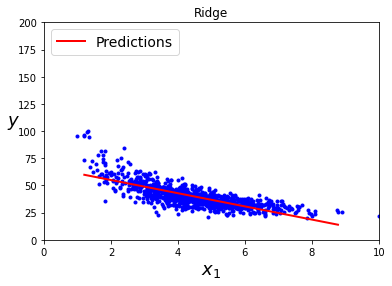

In [ ]:
y_pred = mRidge.predict(X_test)

order = np.argsort(X_test.values.ravel())

sortedXRidge = X_test.values.ravel()[order]
sortedYRidge = y_test.values.ravel()[order]
sorted_predicRidge = y_pred[order]


plt.plot(X, y, "b.")
plt.plot(sortedXRidge, sorted_predicRidge, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Ridge")
plt.axis([0, 10, 0, 200]);

In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(sortedYRidge, sorted_predicRidge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(sortedYRidge, sorted_predicRidge)))
print('r2_score',r2_score(sortedYRidge, sorted_predicRidge))

Error medio Absoluto (MAE): 5.258309900535946
Root Mean Squared Error: 7.36601018878096
r2_score 0.5551021081752664


## *1.3.2-Modelo Lasso*

In [ ]:
mLasso = Lasso(alpha = 1)
mLasso.fit(X_train, y_train)
mLasso.coef_, reg_lineal.intercept_

(array([-5.49259472]), 109.17050688841161)

The model estimates:

$\hat{y} =  -5.49X + 109.17$

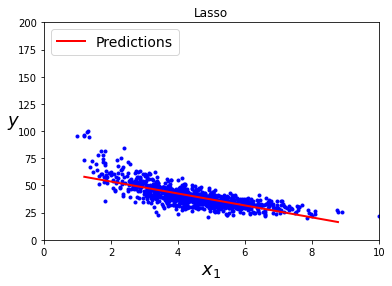

In [ ]:
y_pred = mLasso.predict(X_test)

order = np.argsort(X_test.values.ravel())

sortedXLasso = X_test.values.ravel()[order]
sortedYLasso = y_test.values.ravel()[order]
sorted_predicLasso = y_pred[order]


plt.plot(X, y, "b.")
plt.plot(sortedXLasso, sorted_predicLasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Lasso")
plt.axis([0, 10, 0, 200]);

In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(sortedYLasso, sorted_predicLasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(sortedYLasso, sorted_predicLasso)))
print('r2_score',r2_score(sortedYLasso, sorted_predicLasso))

Error medio Absoluto (MAE): 5.198841722744841
Root Mean Squared Error: 7.386790189351273
r2_score 0.5525883949015797


## *Ejercicio 1.4-* Finalmente gráfica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

Text(0.5, 1.0, 'Comparación de modelos de MAE')

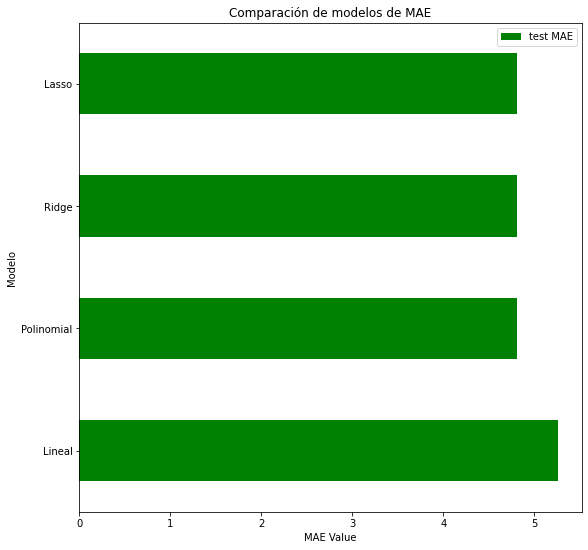

In [ ]:
MAE_lineal = metrics.mean_absolute_error(y_test, Y_new)
MAE_Polinomial = metrics.mean_absolute_error(sortedYPolinom, sorted_predicpolinomy)
MAE_Ridge = metrics.mean_absolute_error(sortedYPolinom, sorted_predicpolinomy)
MAE_Lasso = metrics.mean_absolute_error(sortedYPolinom, sorted_predicpolinomy)

df_comp = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test MAE': [MAE_lineal, MAE_Polinomial, MAE_Ridge, MAE_Lasso]
                 })

fig, ax = plt.subplots(figsize=(9, 9))
df_comp.set_index('modelo').plot(kind='barh', ax=ax,  color='green')
ax.set_xlabel('MAE Value')
ax.set_ylabel('Modelo')
ax.set_title('Comparación de modelos de MAE')

Text(0.5, 1.0, 'Comparación de modelos de R2')

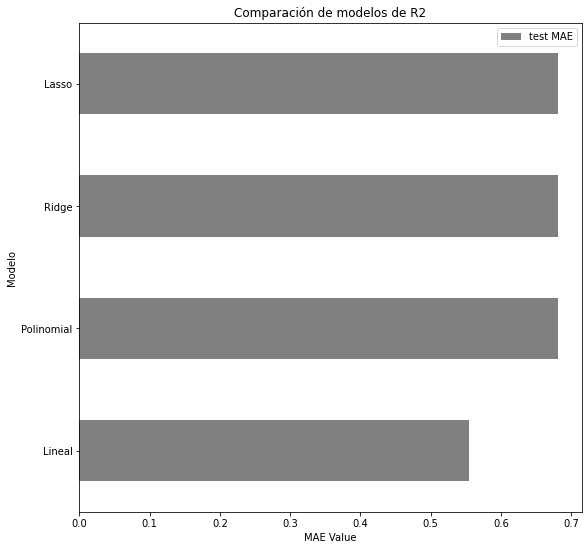

In [ ]:
R2_lineal = metrics.r2_score(y_test, Y_new)
R2_Polinomial = metrics.r2_score(sortedYPolinom, sorted_predicpolinomy)
R2_Ridge = metrics.r2_score(sortedYPolinom, sorted_predicpolinomy)
R2_Lasso = metrics.r2_score(sortedYPolinom , sorted_predicpolinomy)

df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test MAE': [R2_lineal, R2_Polinomial, R2_Ridge, R2_Lasso]
                 })

fig, ax = plt.subplots(figsize=(9, 9))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax, color = 'gray')
ax.set_xlabel('MAE Value')
ax.set_ylabel('Modelo')
ax.set_title('Comparación de modelos de R2')

## *1.5-Explica tus resultados* ¿Qué método conviene más a la empresa, ¿Por qué?, ¿Qué porcentajes de entrenamiento y evaluación usaste?, ¿Qué error tienes?, ¿es bueno?, ¿cómo lo sabes?


El método más adecuado para la empresa, considerando que es el que tiene el error más pequeño, es el método polinomial.

El porcentaje que utilicé fue 20% de validación y 80% de entrenamiento.

El método polonomial, tiene un MAE de 4.80 y un R2 de ,68% lo que indica que tiene una buena representatividad del modelo y podemos decir que es un buen modelo.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

## *2.1-Encuentra el mejor regresor para los datos de las casas:*


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2009,2472930270,20140905T000000,485000.0,3,2.50,3110,9015,2.0,0,0,...,9,3110,0,1990,0,98058,47.4369,-122.147,2650,8960
10936,8562750060,20150420T000000,825000.0,5,3.50,4140,6770,2.0,0,0,...,9,3030,1110,2004,0,98027,47.5381,-122.069,3960,5431
17749,7934000090,20150225T000000,340000.0,2,1.00,690,5200,1.0,0,0,...,6,690,0,1918,0,98136,47.5560,-122.395,1380,5700
20488,8691440220,20150202T000000,1289990.0,5,4.00,4360,8030,2.0,0,0,...,10,4360,0,2015,0,98075,47.5923,-121.973,3570,6185
9439,4302201085,20140918T000000,248000.0,3,1.00,1470,7680,1.0,0,0,...,7,1220,250,1946,0,98106,47.5276,-122.359,1470,6784
19890,5045700400,20150223T000000,559950.0,5,2.75,2990,6370,2.0,0,0,...,8,2990,0,2014,0,98059,47.4853,-122.154,2730,5740
5076,5100402764,20150415T000000,740000.0,3,1.00,1230,6380,1.5,0,0,...,7,1230,0,1927,0,98115,47.6947,-122.315,1250,6380
235,1762600320,20140610T000000,1025000.0,5,4.00,3760,28040,2.0,0,0,...,10,3760,0,1983,0,98033,47.6489,-122.183,3430,35096
3381,7854800090,20141107T000000,799950.0,3,3.00,2900,11769,2.0,0,0,...,10,2900,0,1997,0,98052,47.6993,-122.118,2900,9611
13497,1657530450,20141222T000000,289950.0,3,2.50,1870,1436,2.0,0,0,...,7,1870,0,2004,0,98059,47.4899,-122.166,1720,1852


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


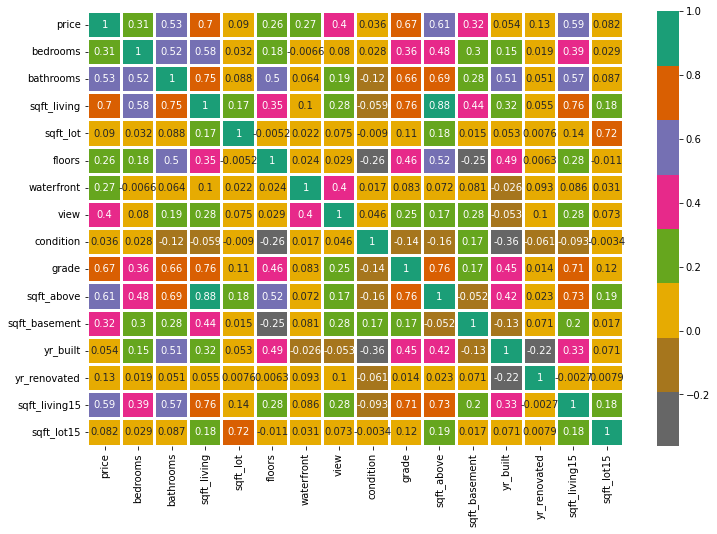

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

x_nueva = df[features]
y_nueva = df[label]

## *2.2-Divide los datos.*
Utiliza la función train_test_split (ya esta en el notebook).

In [ ]:
from sklearn.model_selection import train_test_split
X_train_nueva, X_test_nueva, y_train_nueva, y_test_nueva = train_test_split(x_nueva, y_nueva, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(x_nueva)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train_nueva)}')
print(f'Tamaño de X_train: {X_train_nueva.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test_nueva)}')
print(f'Tamaño del X_test: {X_test_nueva.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


## *2.3-Regresión Múltiple Lineal.*
Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

In [ ]:
regresion_lineal_nueva = LinearRegression(fit_intercept=True)
regresion_lineal_nueva.fit(X_train_nueva, y_train_nueva)

Y_nueva = regresion_lineal_nueva.predict(X_test_nueva)
regresion_lineal_nueva.coef_, regresion_lineal_nueva.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

The model estimates:

$\hat{y} =  -3.82X1 + 4.15X2 + 1.08X3 + 1.71X4 + 3.17X5 + 5.52X6 + 4.12X7+ 2.12X8 + 1.19X9 + 4.78 X10 + 6.02 X11 - 3.55X12 + 1.33X13 + 2.91X14 - 5.48X15 + 6,151,359.26$

In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test_nueva, Y_nueva))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_nueva, Y_nueva)))
print('r2_score',r2_score(y_test_nueva, Y_nueva))

Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score 0.6579723205007814


In [ ]:
Lineal_MAE2 = metrics.mean_absolute_error(y_test_nueva, Y_nueva)
Lineal_R22 = metrics.r2_score(y_test_nueva, Y_nueva)
print(Lineal_MAE2,Lineal_R22)

137480.1388273178 0.6579723205007814


## *2.4-Regresión Múltiple Polinomial.*
Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

In [ ]:
caract_polinom = PolynomialFeatures(degree=2, include_bias=False)
X_polinom_nueva = caract_polinom.fit_transform(X_train_nueva)
regresion_lineal_nueva = LinearRegression(fit_intercept=True)
regresion_lineal_nueva.fit(X_polinom_nueva, y_train_nueva)
regresion_lineal_nueva.coef_, regresion_lineal_nueva.intercept_

X_polinom_nueva = caract_polinom.fit_transform(X_test_nueva)
y_pred_new = regresion_lineal_nueva.predict(X_polinom_nueva)

regresion_lineal_nueva.coef_, regresion_lineal_nueva.intercept_

(array([[ 9.33912834e+05, -1.09330730e+06, -4.56449932e+02,
         -2.78686288e+01, -2.07407238e+06, -3.95431870e+06,
         -2.88638026e+05,  5.58697570e+05,  1.09864510e+06,
         -2.19758415e+02, -3.82034272e+02, -8.59630908e+04,
         -2.95351595e+03,  3.99965710e+03, -3.40106316e+01,
          9.57541696e+02,  7.49958190e+03, -1.37969466e+01,
         -1.84926695e-02,  8.57699569e+03, -1.14965893e+04,
         -3.06588900e+02, -5.24628836e+03, -5.36788065e+03,
         -1.20757669e+00, -1.46068182e+01, -4.67099451e+02,
         -9.13191519e+00,  1.72800642e+01,  2.15500198e-01,
         -9.63429892e+03,  1.53879172e+01, -1.35842369e-01,
         -2.59067293e+04,  4.33707238e+04,  3.82942459e+03,
         -1.07592927e+03,  2.22971689e+04,  1.44292325e+01,
          1.33928361e+00,  5.03401980e+02, -1.70798805e+01,
         -1.72895923e+01, -5.56785248e-02,  1.56185890e+00,
         -4.34972758e+00,  4.83299456e+00,  1.60303193e+02,
         -1.42711737e+01,  1.31138593e+0

La ecuación es muy larga para describrirla en este espacio

In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test_nueva, y_pred_new))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_nueva, y_pred_new)))
print('r2_score',r2_score(y_test_nueva, y_pred_new))

Error medio Absoluto (MAE): 121314.06948173394
Root Mean Squared Error: 186261.28575138954
r2_score 0.7797929072570198


In [ ]:
Polinom_MAE2 = metrics.mean_absolute_error(y_test_nueva, y_pred_new)
Polinom_R22 = metrics.r2_score(y_test_nueva, y_pred_new)
print(Polinom_MAE2, Polinom_R22)

121314.06948173394 0.7797929072570198


## *2.5-Realiza la regresión con Ridge y Lasso.*
Incluye la ecuación de tu modelo, errores y r cuadrada.

# *2.5.1-Ridge*

In [ ]:
m2Ridge = Ridge(alpha = 1)
m2Ridge.fit(X_train_nueva, y_train_nueva)
m2Ridge.coef_, regresion_lineal_nueva.intercept_
y_pred_new = m2Ridge.predict(X_test_nueva)

In [ ]:
m2Ridge.coef_, regresion_lineal_nueva.intercept_

(array([[-3.82192265e+04,  4.14509656e+04,  1.08013951e+02,
          1.69318239e-02,  3.16891574e+04,  5.48258333e+05,
          4.14559235e+04,  2.12264347e+04,  1.19470568e+05,
          4.78066878e+01,  6.02065605e+01, -3.55050129e+03,
          1.33171890e+01,  2.89851987e+01, -5.47998512e-01]]),
 array([80227028.3104757]))

The model estimates:

$\hat{y} =  -3.82X1 + 4.15X2 + 1.08X3 + 1.71X4 + 3.17X5 + 5.52X6 + 4.12X7+ 2.12X8 + 1.19X9 + 4.78 X10 + 6.02 X11 - 3.55X12 + 1.33X13 + 2.91X14 - 5.48X15 + 80,227,028.31$

In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test_nueva, y_pred_new))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_nueva, y_pred_new)))
print('r2_score',r2_score(y_test_nueva, y_pred_new))

Error medio Absoluto (MAE): 137491.0433940327
Root Mean Squared Error: 232165.2426647754
r2_score 0.6578783840295006


In [ ]:
Ridge_MAE2 = metrics.mean_absolute_error(y_test_nueva, y_pred_new)
Ridge_R22 = metrics.r2_score(y_test_nueva, y_pred_new)
print(Ridge_MAE2, Ridge_R22)

137491.0433940327 0.6578783840295006


# *2.5.2-Lasso*

In [ ]:
m2Lasso = Lasso(alpha= 0.01)
m2Lasso.fit(X_train_nueva, np.ravel(y_train_nueva))

y_pred_n2 = m2Lasso.predict(X_test_nueva)


m2Lasso.coef_, regresion_lineal_nueva.intercept_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(array([-3.82007921e+04,  4.14660952e+04,  2.93482224e+02,  1.71356245e-02,
         3.16916458e+04,  5.52689524e+05,  4.12493792e+04,  2.12221167e+04,
         1.19493202e+05, -1.37714566e+02, -1.25272065e+02, -3.55090164e+03,
         1.32602477e+01,  2.90059224e+01, -5.48132637e-01]),
 array([80227028.3104757]))

The model estimates:

$\hat{y} =  -3.82X1 + 4.15X2 + 2.93X3+ 1.71X4 + 3.17X5 + 5.52X6 + 4.12X7+ 2.12X8 + 1.19X9 - 1.38 X10 - 1.38 X11 - 1.25X12 - 3.55X13 + 1.32X14 + 2.90X15 + -5.48D16 + 80,227,028.31$

In [ ]:
Lasso_MAE2 = metrics.mean_absolute_error(y_test_nueva, y_pred_new)
Lasso_R22 = metrics.r2_score(y_test_nueva, y_pred_new)
print(Lasso_MAE2, Lasso_R22)

137491.0433940327 0.6578783840295006


## *2.6-Finalmente gráfica :*
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

Text(0.5, 1.0, 'MAE de los Modelos')

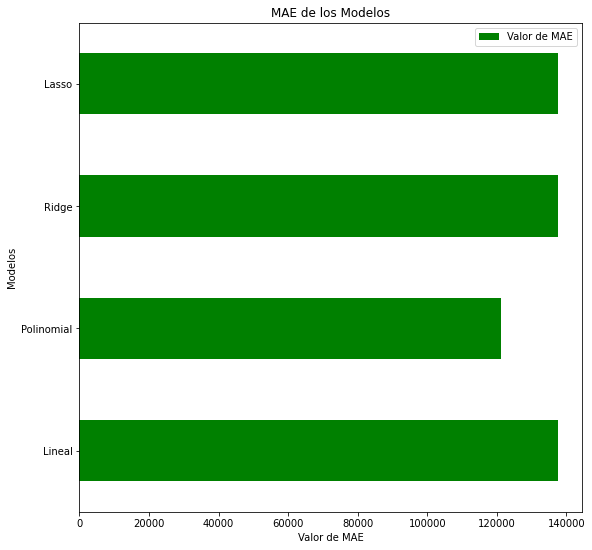

In [ ]:
comparacion_df = pd.DataFrame({
                    'mod': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'Valor de MAE': [Lineal_MAE2, Polinom_MAE2, Ridge_MAE2, Lasso_MAE2]
                 })

fig, ax = plt.subplots(figsize=(9, 9))
comparacion_df.set_index('mod').plot(kind='barh', ax=ax, color='green')
ax.set_xlabel('Valor de MAE')
ax.set_ylabel('Modelos')
ax.set_title('MAE de los Modelos')

Text(0.5, 1.0, 'R2 de los Modelos')

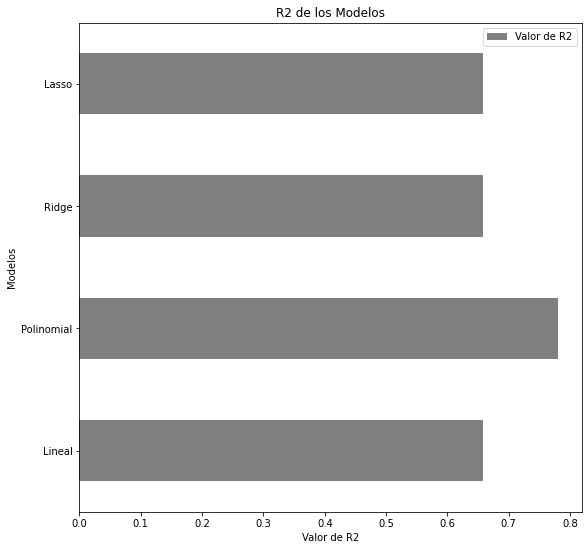

In [ ]:
comparacion_df_R22 = pd.DataFrame({
                    'mod': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'Valor de R2': [Lineal_R22, Polinom_R22, Ridge_R22, Lasso_R22]
                 })

fig, ax = plt.subplots(figsize=(9, 9))
comparacion_df_R22.set_index('mod').plot(kind='barh', ax=ax, color='gray')
ax.set_xlabel('Valor de R2')
ax.set_ylabel('Modelos')
ax.set_title('R2 de los Modelos')

## *2.7-Explica tus resultados* 
¿Qué método se aproxima mejor
El mejor indicador es el Polinonial, ¿Por qué? porque en la gràfica se observa que tiene una mejor R2, ¿Qué porcentajes de entrenamiento y evaluación usaste? utilice de manera conservador escogí 80% y 20% ¿Què error tienes? tiene un error de , ¿es bueno? es bueno, ¿Cómo lo sabes? es el mejor porcentaje de error comparado con los demás modelos

## *2.8-Agrega conclusiones*

Para ambos ejercicios el mejor modelo fue la polinonial, es importante destacar que a partir del ejercicio nos permitiò hacer una comparación de las R2 y MAE de los modelos, para por ende definir cuál es el modelo que se adapta mejor a la base de datos.

## *2.9-Agradecimientos y Bibliografia*

Agradezco el haber realizado esta práctica porque me permitió tener un mejor entendimiento de los modelos Ridge, Lasso, Regresión Lineal y Polinomial, pero sobre todo hacer una comparativa, para poder establecer cual es el modelo que es el más adecuado utilizar acorde a la base de datos.


Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".

VanderPlas, J.  Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc.".